## Lab 10
## Gaussian Bandits: Exploration vs. Exploitation 

# Deadline: 14 December 2023 


In this lab, we will explore the trade-off between exploration and exploitation in a two-arm Gaussian bandit setting. The goal is to understand how different sampling strategies impact the cumulative reward obtained by an agent over time and how not-exploring enough prevents the agents from learning the distributions.

Key Components of Multi-Armed Bandits:

1) Arms:

Each arm represents an action or decision that the agent can take.
Pulling an arm corresponds to selecting an action or making a decision.

2) Rewards:

When an arm is pulled, a reward is received from a probability distribution associated with that arm.
The distribution of rewards for each arm is initially unknown to the agent.

3) Exploration vs. Exploitation:

Exploration: Trying different arms to gather information about their reward distributions.
Exploitation: Leveraging gathered information to maximize rewards by choosing arms that seem to be the best based on the available knowledge.

4) Regret:

In multi-armed bandit problems, regret is a metric that measures the opportunity loss incurred by not always selecting the best arm.
It quantifies how much the cumulative reward earned by the agent deviates from the maximum possible cumulative reward achievable by always selecting the best arm.




Imagine a scenario with two arms (A and B) with reward distributions as Gaussian: 
Arm A with mean 5 and variance $\sigma$. and
Arm B with mean $\mu$ and variance 1.

In this lab $\mu$ will always be greater than $5$.

An oracle with full-knowledge of the distributions will always select arm B. However, when an agent does not have any information regarding the distributions (other than the distributions being Gaussian), finding the optimal arm takes some time. In this problem, the regret that agent obtains depends on how many times, it selects the arm A (which is the suboptimal arm). Let us denote the total number of times arm A is selected as $n_A$. Then the cumulative regret will be $n_A* (\mu - 5)$.






## The Simulation Environment

The time horizon of a single simulation will be denoted as T.

1) Create variables that keep track of the average reward obtained by pullin the arms, and how many times those arms are selected. Maintain variables num_trial_arm_a and average_reward_arm_a for Arm A and num_trial_arm_b and average_reward_arm_b for Arm B, to keep track of the number of times each arm is chosen and their respective average rewards. 

2) Create a For loop for $t=  1:T$.

3) At each iteration $t$, the agent will choose one arm using a function that will be specified.

4) At each iteration $t$, the agent will obtain a reward. The reward will be sampled from the distribution $\mathcal{N}(5,\sigma)$ if the agent pulls arm A. The reward will be sampled from the distribution $\mathcal{N}(\mu,1)$ if the agent pulls arm B. You can use the numpy.random.normal function for generating the samples.

5) At each iteration $t$, the agent will increasenum_trial_arm_ $i$ by one when it selects arm $i$ for $i \in \{ A,B\}$.

6) At each iteration $t$, the agent will update the average observed rewards (average_reward_arm_ $i$ ).



## Sampling Function for Part 1

The million dollar question in  Multi-Armed Bandit problems is how to select the sampling function. In the first question, you will act as a myopic agent. At each iteration of $t$, you are going to call a function called: sample_arm_greedy(average_reward_arm_a,average_reward_arm_b). 

The function will output which arm to select. If average_reward_arm_a $>$ average_reward_arm_b, the agent will sample arm A, if not it will sample the arm B.

Here, at every single iteration the agent acts greedily. It does not explores but fully exploits. 

## Part 1 Tasks (40 Points):


1) Write a code for simulating the given environment and the greedy sampling function.

2) Run simulations for $T = 200$ and $\sigma \in  \{0.1, 1,5,10\}$, $\mu \in  \{5.001,5.1,10\}$. Run $100$ simulations FOR EACH $(\mu,\sigma)$ pair and calculate the average cumulative regret FOR EACH $(\mu,\sigma)$ pair. This will be the sum of all simulation-wise cumulative regrets divided by 100. For a single simulation, the cumulative regret is given as num_trial_arm_A(T)$*(\mu - 5)$ where num_trial_arm_A(T) is the value of num_trial_arm_A at the end of iteration $t = T$ Do not forget to make average-reward_ $i$ and num_trial_arm_ $i$ zero at the start of every simulation.

3) Run 100 simulation for $T = 1000$ with $\sigma = 5$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration (The averaging is done over the 100 simulations.). Let us denote that vector as $n_A^T$. (Note that this vector will have length $T$) Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.

4) Run 100 simulation for $T = 1000$ with $\sigma = 0.1$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.


5) Run 100 simulation for $T = 1000$ with $\sigma = 1$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.

In [79]:
# Code for problem 1.1
import numpy as np
import matplotlib.pyplot as plt

def sample_arm_greedy(average_reward_arm_a, average_reward_arm_b):
    if average_reward_arm_a > average_reward_arm_b:
        return 'A'
    else:
        return 'B'

In [92]:
# Code for problem 1.2
num_simulations = 100
T = 200
sigma_val = [0.1, 1, 5, 10]
mu_val = [5.001, 5.1, 10]
average_regrets = np.zeros(12)

for sim in range(num_simulations):
    count = 0
    for sigma in sigma_val:
        for mu in mu_val:
            num_trial_arm_a = 0
            num_trial_arm_b = 0
            average_reward_arm_a = 0
            average_reward_arm_b = 0
            for t in range(1, T+1):
                chosen_arm = sample_arm_greedy(average_reward_arm_a, average_reward_arm_b)
                if t==1:
                    reward = np.random.normal(5, sigma)
                    num_trial_arm_a+=1
                    average_reward_arm_a+=reward
                elif t==2:
                    reward = np.random.normal(mu, 1)
                    num_trial_arm_b+=1
                    average_reward_arm_b+=reward
                elif chosen_arm=='A':
                    reward = np.random.normal(5, sigma)
                    num_trial_arm_a+=1
                    average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
                else:
                    reward = np.random.normal(mu, 1)
                    num_trial_arm_b+=1
                    average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
            average_regrets[count]+=num_trial_arm_a*(mu - 5)
            count+=1
            
for i in range (len(average_regrets)):
    average_regrets[i]/=100
    
print('For muse = 5.001 sigma = 0.1 :', average_regrets[0])
print('For muse = 5.1 sigma = 0.1 :', average_regrets[1])
print('For muse = 10 sigma = 0.1 :', average_regrets[2])
print('For muse = 5.001 sigma = 1 :', average_regrets[3])
print('For muse = 5.1 sigma = 1 :', average_regrets[4])
print('For muse = 10 sigma = 1 :', average_regrets[5])
print('For muse = 5.001 sigma = 5 :', average_regrets[6])
print('For muse = 5.1 sigma = 5 :', average_regrets[7])
print('For muse = 10 sigma = 5 :', average_regrets[8])
print('For muse = 5.001 sigma = 10 :', average_regrets[9])
print('For muse = 5.1 sigma = 10 :', average_regrets[10])
print('For muse = 10 sigma = 10 :', average_regrets[11])

For muse = 5.001 sigma = 0.1 : 0.16928000000005639
For muse = 5.1 sigma = 0.1 : 14.918999999999947
For muse = 10 sigma = 0.1 : 5.0
For muse = 5.001 sigma = 1 : 0.09693000000003245
For muse = 5.1 sigma = 1 : 8.963999999999977
For muse = 10 sigma = 1 : 5.0
For muse = 5.001 sigma = 5 : 0.05127000000001712
For muse = 5.1 sigma = 5 : 3.7319999999999878
For muse = 10 sigma = 5 : 6.2
For muse = 5.001 sigma = 10 : 0.032500000000010854
For muse = 5.1 sigma = 10 : 2.117999999999991
For muse = 10 sigma = 10 : 12.95


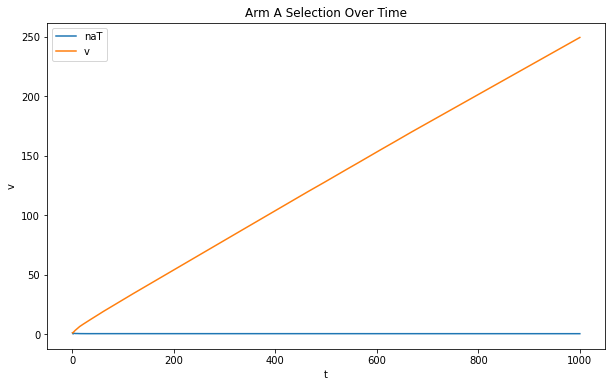

In [93]:
# Code for problem 1.3
T = 1000
num_simulations = 100
mu = 5.1
sigma = 5
naT = np.zeros(T)
v = np.zeros(T)

for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_greedy(average_reward_arm_a, average_reward_arm_b)
        if t==1:
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a+=reward
            naT[t-1]+=1
        elif t==2:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b+=reward
        elif chosen_arm=='A':
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
        
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()

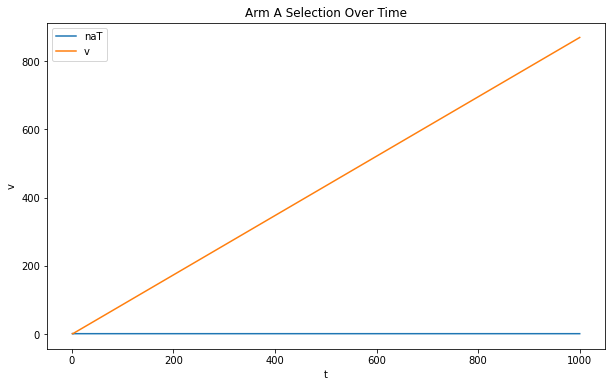

In [97]:
# Code for problem 1.4
T = 1000
num_simulations = 100
mu = 0.1
sigma = 5
naT = np.zeros(T)
v = np.zeros(T)

for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_greedy(average_reward_arm_a, average_reward_arm_b)
        if t==1:
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a+=reward
            naT[t-1]+=1
        elif t==2:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b+=reward
        elif chosen_arm=='A':
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
        
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()

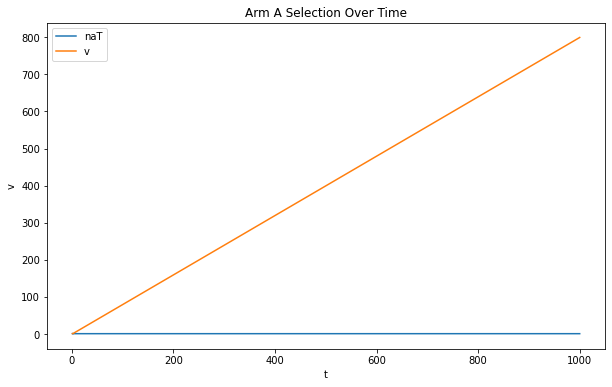

In [98]:
# Code for problem 1.5
T = 1000
num_simulations = 100
mu = 1
sigma = 5
naT = np.zeros(T)
v = np.zeros(T)

for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_greedy(average_reward_arm_a, average_reward_arm_b)
        if t==1:
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a+=reward
            naT[t-1]+=1
        elif t==2:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b+=reward
        elif chosen_arm=='A':
            reward = np.random.normal(5, sigma)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
        
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()


## Sampling Function for Part 2

In the second part, you will utilize the ETC algorithm. The algorithm can be found in the 6.1 Algorithm and Regret Analysis section of Bandit Algorithms book by Tor Lattimore and Csaba Szepesv´ari. Note that this algorithm is dependent on the variance of the rewards. Thus for simplicity, we will use the following rewards distributions: Arm A with reward distribution $\mathcal{N}(5,1)$ and Arm B with reward distribution $\mathcal{N}(\mu,1)$.

 At each iteration of $t$, you are going to call a function called: sample_arm_ETC(average_reward_arm_a,average_reward_arm_b,t). 

 The agent will explore each arm $m$ times, and after $t>2m$, the agent will exploit by selecting the arm with the highest average reward. Select $m$ as $\sqrt{T}/2$, unless it is asked otherwise.


## Part 2 Tasks (30 Points):


1) Write a code for the ETC sampling function.

2) Run simulations for $T = 200$ and  $\mu \in  \{5.001,5.1,10\}$. Run $100$ simulations FOR EACH $\mu$ value and calculate the average cumulative regret FOR EACH $\mu$ . (It will be the sum of all simulation-wise cumulative regrets divided by 100.) Comment on the affect of changing $\mu$ .

3) Run 100 simulation for $T = 1000$ with $\sigma = 1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v. Compare it with the greedy sampling strategy.

4) Run simulations for $T = 200$,  $\mu =  \{5.1\}$ and $m \in \{\sqrt{T}/4, \sqrt{T}/2,T/2\}$. Comment on the affect of the exploration parameter $m$. Connect that to the regret bound given by Theorem 6.1 in Bandit Algorithms book.



In [99]:
# Code for problem 2.1

import math

def sample_arm_ETC(average_reward_arm_a, average_reward_arm_b,t,m):
    if t<=2*m:
        if t%2==0:
            return 'A'
        else:
            return 'B'
    else:
        if average_reward_arm_a > average_reward_arm_b:
            return 'A'
        else:
            return 'B'

In [100]:
# Code for problem 2.2

num_simulations = 100
T = 200
mu_val = [5.001, 5.1, 10]
m = math.sqrt(T)/2
average_regrets = np.zeros(3)

for sim in range(num_simulations):
    count = 0
    for mu in mu_val:
        num_trial_arm_a = 0
        num_trial_arm_b = 0
        average_reward_arm_a = 0
        average_reward_arm_b = 0
        for t in range(1, T+1):
            chosen_arm = sample_arm_ETC(average_reward_arm_a, average_reward_arm_b,t,m)
            if chosen_arm=='A':
                reward = np.random.normal(5, 1)
                num_trial_arm_a+=1
                average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            else:
                reward = np.random.normal(mu, 1)
                num_trial_arm_b+=1
                average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
        average_regrets[count]+=num_trial_arm_a*(mu - 5)
        count+=1
            
for i in range (len(average_regrets)):
    average_regrets[i]/=100
    
print('For muse = 5.001 :', average_regrets[0])
print('For muse = 5.1 :', average_regrets[1])
print('For muse = 10 :', average_regrets[2])

For muse = 5.001 : 0.1009600000000337
For muse = 5.1 : 7.587999999999981
For muse = 10 : 35.0


Changing the value of muse seems to change the average number of regrets. In particular, as muse increases, so does the average number of regrets.

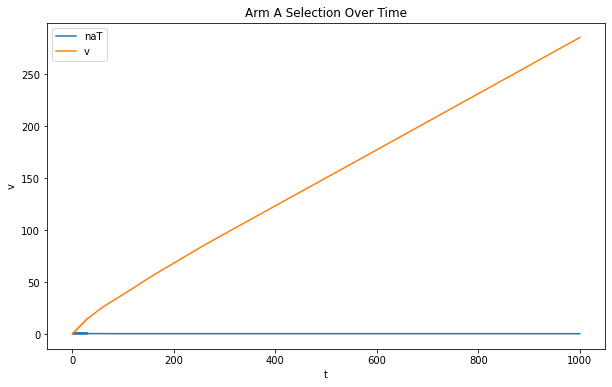

In [101]:
# Code for problem 2.3

num_simulations = 100
T = 1000
mu = 5.1
m = math.sqrt(T)/2
naT = np.zeros(T)
v = np.zeros(T)


for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_ETC(average_reward_arm_a, average_reward_arm_b,t,m)
        if chosen_arm=='A':
            reward = np.random.normal(5, 1)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(mu, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
            
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()

Compared to the greedy algorithm, there seems to be less times arm a has been selected.

In [112]:
# Code for problem 2.4

num_simulations = 100
T = 1000
mu = 5.1
m_vals = [math.sqrt(T)/4, math.sqrt(T)/2, T/2]
average_regrets = np.zeros(3)

for sim in range(num_simulations):
    count = 0
    for m in m_vals:
        num_trial_arm_a = 0
        num_trial_arm_b = 0
        average_reward_arm_a = 0
        average_reward_arm_b = 0
        for t in range(1, T+1):
            chosen_arm = sample_arm_ETC(average_reward_arm_a, average_reward_arm_b,t,m)
            if chosen_arm=='A':
                reward = np.random.normal(5, 1)
                num_trial_arm_a+=1
                average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            else:
                reward = np.random.normal(mu, 1)
                num_trial_arm_b+=1
                average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
        average_regrets[count]+=num_trial_arm_a*(mu - 5)
        count+=1
            
for i in range (len(average_regrets)):
    average_regrets[i]/=100
    
print('For m = sqrt(T)/4 :', average_regrets[0])
print('For m = sqrt(T)/2 :', average_regrets[1])
print('For m = T/2 :', average_regrets[2]) 

For m = sqrt(T)/4 : 36.03399999999985
For m = sqrt(T)/2 : 29.6969999999999
For m = T/2 : 49.99999999999991


As m increases, it seems that the error bound increases along with it. The regret bound essentially composed of both the regret in the exploration and explotation. In the bound equation, both are dependent on m, so it makes since that as m increases the bound will increase.


## Sampling Function for Part 3

In the third part, you will utilize the UCB algorithm. The algorithm can be found in the 7.1 Algorithm and Regret Analysis section of Bandit Algorithms book by Tor Lattimore and Csaba Szepesv´ari. It is the Algorithm 3.  Note that this algorithm is dependent on the variance of the rewards. Thus for simplicity, we will use the following rewards distributions: Arm A with reward distribution $\mathcal{N}(5,1)$ and Arm B with reward distribution $\mathcal{N}(\mu,1)$.

 At each iteration of $t$, you are going to call a function called: sample_arm_UCB(average_reward_arm_a,average_reward_arm_b, num_trial_arm_A, num_trial_arm_B, t). 

 Select the $\delta$ in the algorithm as $1/T^2$.



## Part 3 Tasks (30 Points):



1) Write a code for the UCB sampling function.

Select $\delta$ as $1/T^2$.


2) Run 100 simulation for $T = 1000$ with $\sigma = 1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v. Compare it with the greedy sampling strategy and the ETC algorithm. 

4) Run simulations for $T = 200$ and  $\mu =  \{5.1\}$ and $\delta = 1/T$. Comment on the affect of the exploration parameter $\delta$. 

In [103]:
# Code for problem 4.1

def sample_arm_UTC(average_reward_arm_a,average_reward_arm_b, num_trial_arm_A, num_trial_arm_B, delta):
    confidence_bound_a = average_reward_arm_a + math.sqrt(2*math.log(1/delta)/(num_trial_arm_A + 1))
    confidence_bound_b = average_reward_arm_b + math.sqrt(2*math.log(1/delta)/(num_trial_arm_B + 1))
    if confidence_bound_a > confidence_bound_b:
        return 'A'
    else:
        return 'B'

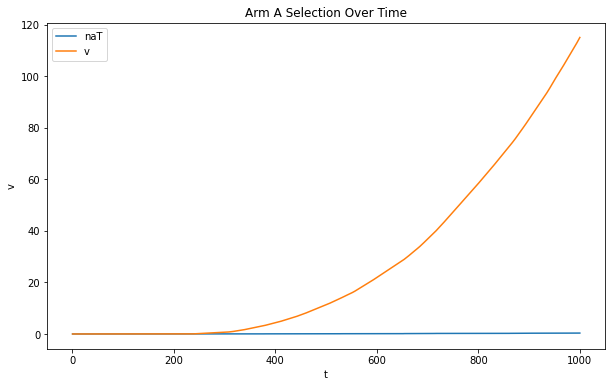

In [104]:
# Code for problem 4.2

num_simulations = 100
T = 1000
delta = 1/T**2
naT = np.zeros(T)
v = np.zeros(T)

for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_UTC(average_reward_arm_a, average_reward_arm_b, num_trial_arm_a, num_trial_arm_b, delta)
        if chosen_arm=='A':
            reward = np.random.normal(5, 1)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(5.1, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
            
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()

Compared to both the greedy and the ETC algorithm, UTC seems to have to have the overall smallest number of arm A being selected over the 1000 time period. It is also different than the other two as it grows exponentially.

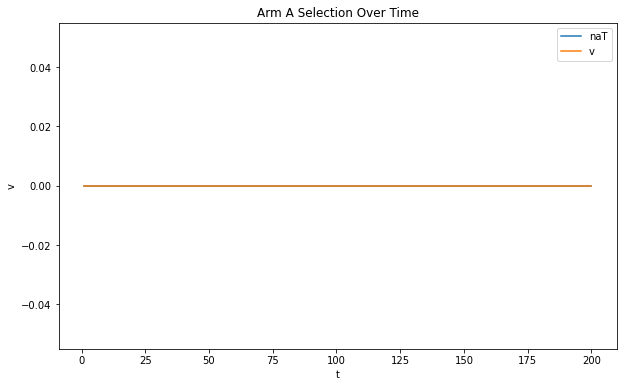

In [105]:
# Code for problem 4.3

num_simulations = 100
T = 200
delta = 1/T
naT = np.zeros(T)
v = np.zeros(T)

for sim in range(num_simulations):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    average_reward_arm_a = 0
    average_reward_arm_b = 0
    for t in range(1, T+1):
        chosen_arm = sample_arm_UTC(average_reward_arm_a, average_reward_arm_b, num_trial_arm_a, num_trial_arm_b, delta)
        if chosen_arm=='A':
            reward = np.random.normal(5, 1)
            num_trial_arm_a+=1
            average_reward_arm_a = (average_reward_arm_a*(num_trial_arm_a-1)+reward)/num_trial_arm_a
            naT[t-1]+=1
        else:
            reward = np.random.normal(5.1, 1)
            num_trial_arm_b+=1
            average_reward_arm_b = (average_reward_arm_b*(num_trial_arm_b-1)+reward)/num_trial_arm_b
            
for i in range (T):
    naT[i]/=num_simulations
    
cumulative = 0
for i in range (T):
    cumulative+=naT[i]
    v[i]+=cumulative

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), naT, label='naT')
plt.plot(range(1, T + 1), v, label='v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title('Arm A Selection Over Time')
plt.show()

The choice of sigma seems to affect how often arm A will be picked as this time, arm A wasn't picked at all.

## Part 4 (60 Points): Finally, let us think a little bit more about the theory and aplicability of Multi-Armed Bandits.

Please answer the following questions. Each question is worth 10 points. Last question is worth 20 points.

Q1: Can an agent completely eliminate regret in a multi-armed bandit scenario? Why or why not?

Q2:What strategies might be effective in handling scenarios where reward distributions change over time?

Q3:How might multi-armed bandits be utilized in optimizing decision-making in industries like healthcare, finance, or technology?

Q4:Are there scenarios where the exploration-exploitation trade-off becomes particularly difficult to manage?

Q5 (20 points): Explain Thompson Sampling as a way to solve this problem (as a way to achieve Exploration/Exploitation balance). You will need to use the Bayes' update rule, so first you should explain the Bayes' update rule. For that, you can give an example. You can explain Thompson Sampling Algorithm better with a detailed pseudo-code that consist of the Bayesin updates.



Q1: No because there will always be some for of regret when using these algorithms. It is probabilistic based and these algorithms use that or training to determine which is the best option. This means there will always be some form of error leading to regret.


Q2: Algorithms or ways to implement something that will always learn over time can fix this. This may cause the runtime of the algorithm to be longer, but it will be more accurate as it can always be learning and decide which is the best option.


Q3: It can help decide between multiple choices by learning. For example in healthcare, it can learn from which age groups a disease is more likely to occur or in finance, it could help determine which stock has the best returns in realtime.


Q4: Yes. In high changing environments or if there is a high cost of picking a wrong choice, the trade-offs will become difficult to manage as benefiting one over the other can cause significant drawbacks down the line.


Q5: Bayes' update rule is basically updating probability based on new information. This means it will constantly be updating its probability. An example of this is the healthcare example mentioned before. As new information comes in about which ages a disease is affecting, you can update your probabilities. Thompson Sampling can solve the problems as it runs simulations from previous data to decide the best option to pick. After it picks the option, it waits to see the result and it Bayesian updates the probabilites for the next time. This means it is always changing and adapting to new environments and it can solve the previously mentioned problem.